In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [4]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [5]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [6]:
df2007 =df.loc['2007-12-31':'2007-01-01']

In [7]:
df2007.groupby(df2007['event_type'])['fatalities'].sum()

event_type
Battles                       378
Explosions/Remote violence      3
Protests                        0
Riots                         271
Strategic developments          0
Violence against civilians    310
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

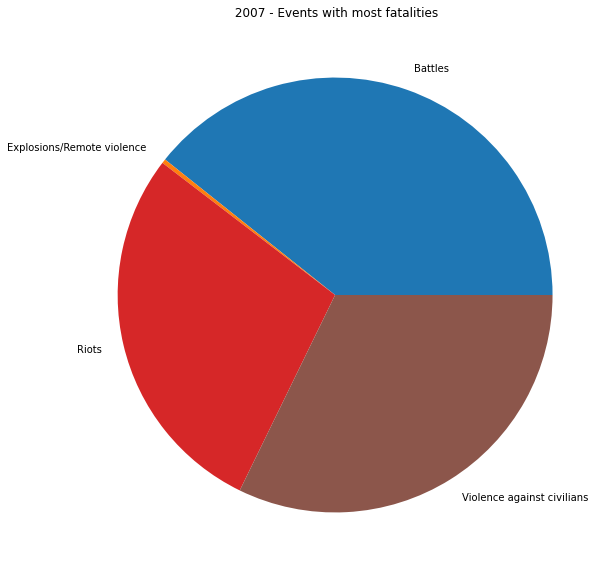

In [8]:
df2007.groupby(df2007['event_type'])['fatalities'].sum().plot(kind='pie',figsize=(14,10))
plt.title(' 2007 - Events with most fatalities')
plt.ylabel(' ')

In [9]:
df2007.groupby([df2007['event_type'], df2007['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                   
Battles                     Armed clash                          378
Explosions/Remote violence  Remote explosive/landmine/IED          1
                            Shelling/artillery/missile attack      0
                            Suicide bomb                           2
Protests                    Peaceful protest                       0
                            Protest with intervention              0
Riots                       Mob violence                          12
                            Violent demonstration                259
Strategic developments      Headquarters or base established       0
Violence against civilians  Abduction/forced disappearance         0
                            Attack                               310
                            Sexual violence                        0
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

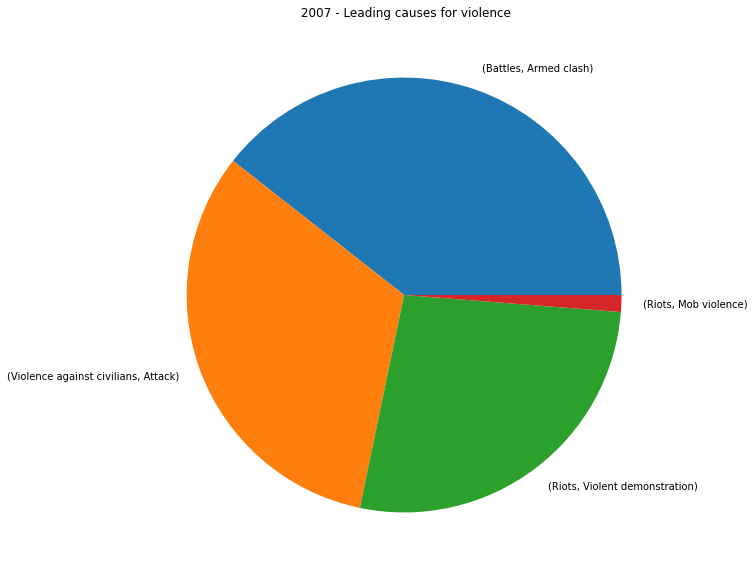

In [15]:
df2007.groupby([df2007['event_type'], df2007['sub_event_type']])['fatalities'].sum().sort_values(ascending=False)[:4].plot(kind='pie', figsize=(14,10))
plt.title(' 2007 - Leading causes for violence')
plt.ylabel(' ')

Text(0.5, 0, 'Number of fatalities')

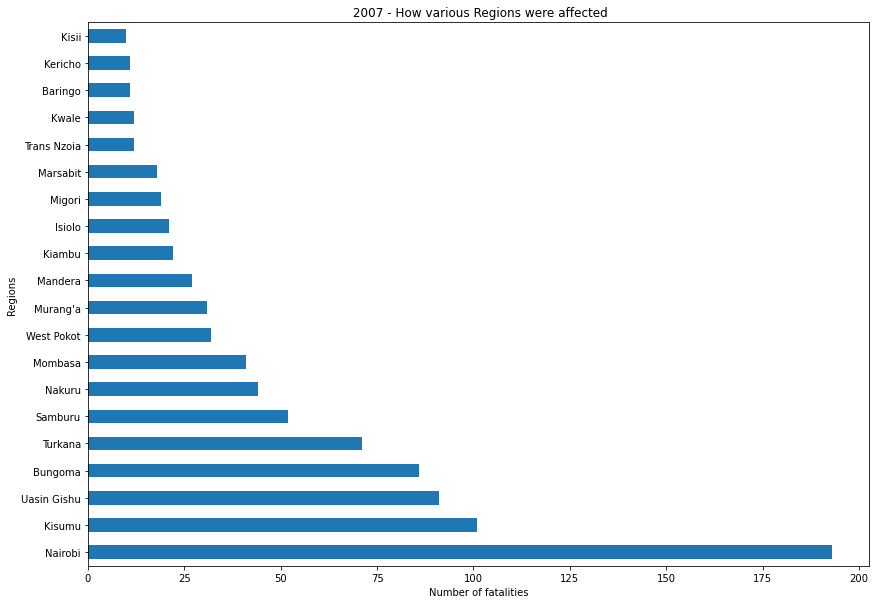

In [11]:
df2007.groupby(df2007['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10))
plt.title(' 2007 - How various Regions were affected')
plt.ylabel('Regions')
plt.xlabel('Number of fatalities')

In [16]:
regions = df2007.groupby([df2007['admin1'],df2007['sub_event_type']])['fatalities'].sum()


Text(0.5, 0, 'Number of fatalities')

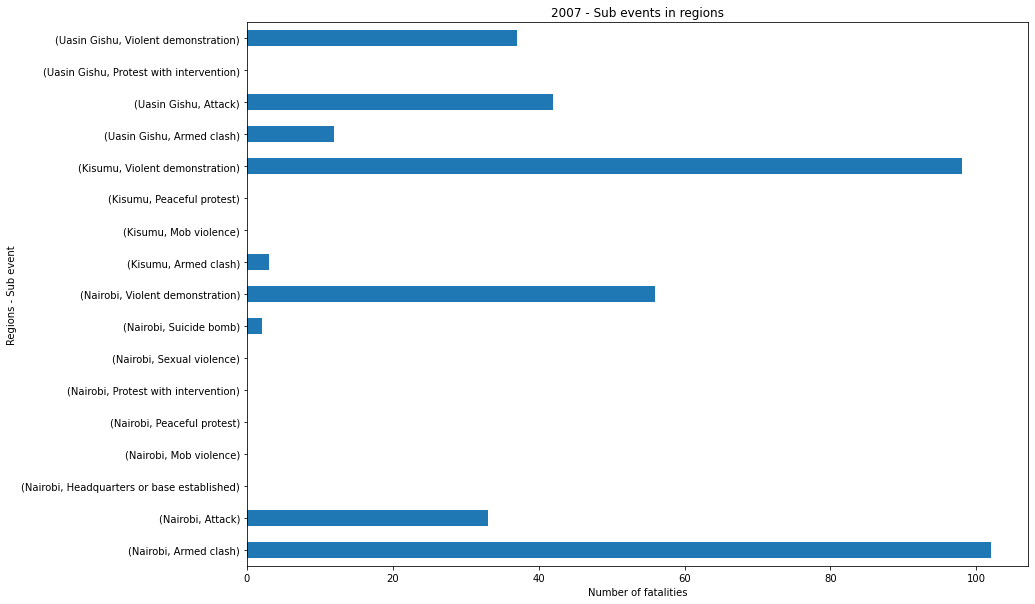

In [17]:
regions[['Nairobi', 'Kisumu', 'Uasin Gishu']].plot(kind='barh', figsize=(14,10))
plt.title('2007 - Sub events in regions')
plt.ylabel('Regions - Sub event')
plt.xlabel('Number of fatalities')
